In [2]:
import pandas as pd
import numpy as np
import os,glob
from matplotlib import pyplot as plt

In [144]:
new = pd.read_json('merged_summary_topics.json')
# my data is in data2 not data
new['File'] = [x[5:] for x in new.File]
new['File_num'] = [int(x[:-4]) for x in new.File]
new['tag_count'] = [len(x) for x in new.topic_lists]
# setting the index to file_num makes it hard to select 
# new.set_index('File_num',inplace=True)

In [145]:
[len(list(x)) for x in new.topic_lists[:5]]

[4, 7, 4, 2, 2]

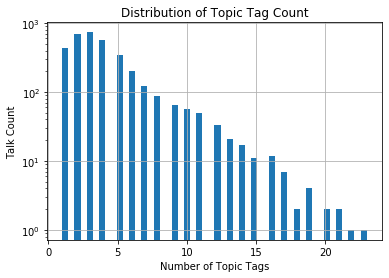

In [155]:
# print(new['tag_count'].describe())
new['tag_count'].hist(bins=50)
plt.yscale('log')
plt.xlabel('Number of Topic Tags')
plt.ylabel('Talk Count')
plt.title('Distribution of Topic Tag Count')
plt.show()

In [151]:
new.iloc[50][['topic_lists','tag_count']]

topic_lists    [music, youth, Satan]
tag_count                          3
Name: 50, dtype: object

# Maybe the Gibbs LDA will do better if there are fewer topics for the talk
- or probably not just because speakers usually cover a lot of topics generally, and share scriptures that might be gibbs lda to pick up

In [127]:
new.File_num.max(),new.File_num.min()

(8361, 2000)

In [158]:
keep = ['Title','Speaker','File','Year','Month_letter','topic_lists','tag_count','File_num']
new.loc[new.revelation == 1][keep]

,Title,Speaker,File,Year,Month_letter,topic_lists,tag_count,File_num
2850,Obedience to the Prophets,Claudio R. M. Costa,7740.txt,2010,O,"[prophets, obedience, revelation]",3,7740
2867,The Holy Ghost and Revelation,Jay E. Jensen,7759.txt,2010,O,"[Jesus Christ, Holy Ghost, prayer, testimony, ...",6,7759
2869,Two Lines of Communication,Dallin H. Oaks,7761.txt,2010,O,"[Church organization, Holy Ghost, prayer, prie...",5,7761
2872,Receive the Holy Ghost,David A. Bednar,7764.txt,2010,O,"[Restoration, baptism, Holy Ghost, obedience, ...",5,7764
2906,The Spirit of Revelation,David A. Bednar,7802.txt,2011,A,"[faith, Holy Ghost, obedience, revelation, Chu...",5,7802
2914,An Ensign to the Nations,Jeffrey R. Holland,7810.txt,2011,A,"[prophets, Holy Ghost, Quorum of the Twelve Ap...",5,7810
3161,Continuing Revelation,Henry B. Eyring,8057.txt,2014,O,"[prophets, revelation, family]",3,8057
3231,Turn to Him and Answers Will Come,James B. Martino,8127.txt,2015,O,"[faith, prayer, obedience, adversity, fasting,...",8,8127
3244,That They Do Always Remember Him,Claudio R. M. Costa,8140.txt,2015,O,"[Jesus Christ, sabbath, Sabbath, revelation, s...",5,8140
3245,The Holy Ghost as Your Companion,Henry B. Eyring,8141.txt,2015,O,"[truth, Holy Ghost, death, revelation, sacrament]",5,8141


In [160]:
file_num = 8057
x = new.loc[new.File_num == file_num][['Title','Speaker','File','Year','Month','topic_lists','File_num','tag_count']]
print(x.topic_lists.values[0])
x

['prophets', 'revelation', 'family']


,Title,Speaker,File,Year,Month,topic_lists,File_num,tag_count
3161,Continuing Revelation,Henry B. Eyring,8057.txt,2014,10,"[prophets, revelation, family]",8057,3


In [108]:
#gs for gibbs sampler
gs = LDACGS(n_topics=10)
# gs.buildCorpus(filename='reagan.txt')
# gs.initialize()
# gs._sweep()

gs.sample(filename='data2/' + new.loc[new.File_num == file_num].File.values[0]
        , stopwords_file='../3winter21/Gibbs_LDA/' + 'stopwords.txt')

In [109]:
talk_string = f'{x.Speaker.iloc[0]} `{x.Title.iloc[0]}` from {x.Month.iloc[0]}-{x.Year.iloc[0]}'

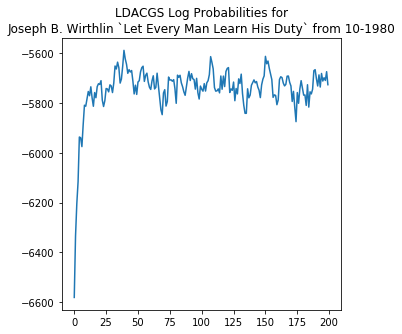

In [110]:
fig = plt.figure(figsize=(5,5))
plt.plot(gs.logprobs)
plt.title('LDACGS Log Probabilities for\n' + talk_string)
plt.savefig(f'LDACGS Log Probabilities for {talk_string}.png',dpi=200)
plt.show()

# the gs.topterms shows that some terms weren't encoded appropriately
`\xa0d&c'`
`\xa03\xa0nephi`

In [111]:
print('for\n',talk_string,'\nthe true topics are:\n',x.topic_lists.iloc[0],'\n\nThe Gibbs LDA Top Terms are:\n\n')
for i, topic in enumerate(gs.topterms(n_terms=5)):
    print(topic)
    
## this didn't work
# for i, line in enumerate(gs.toplines(n_lines=3)):
#     print(i,line)

for
 Joseph B. Wirthlin `Let Every Man Learn His Duty` from 10-1980 
the true topics are:
 ['duty'] 

The Gibbs LDA Top Terms are:


['happiness', 'duty', 'commandments.', 'happiness.', 'father’s']
['faithful', 'great', 'work', 'president', 'jamaica.']
['duty', 'hundred', '“one', 'percent.”', 'gospel']
['duty', 'great', 'perform', 'mind', 'personal']
['problem', 'teach', 'food', 'missionaries', 'proper']
['duty', 'children', 'bring', 'true', 'god.']
['parts', 'bicycles', 'missionaries', 'obtaining', 'bicycle']
['duty', 'great', 'personal', 'faithful', 'fulfilled']
['church', 'tree', '“for', 'wonderful', 'members']
['man', 'good', 'heart', 'bringeth', 'foundation']


In [178]:
talk_string

'Joseph B. Wirthlin `Let Every Man Learn His Duty` from 10-1980'

# EXPLORE HYPERPARAMETERS

In [203]:
def view_hyper_parameters(results):
    talk_string = f'{x.Speaker.iloc[0]} `{x.Title.iloc[0]}` from {x.Month.iloc[0]}-{x.Year.iloc[0]}'
    fig,ax = plt.subplots(5,5,figsize=(25,25))
    
    for i,a in enumerate(alphas):
        for j,b in enumerate(betas):
            #gs for gibbs sampler
            raise NotImplementedError('display the grid search given the results dictionary or df dataframe')
            fig = plt.figure(figsize=(5,5))
            #ax[i,j].plot(gs.logprobs[50:])
            ax[i,j].plot(gs.logprobs)
            ax[i,j].set_ylim(-int(1e4),-int(6e3))
            
            ax[i,j].set_title(f'\nalpha={a}\nbeta={b}')
    plt.tight_layout()
    #plt.savefig('.png',dpi=200)
    plt.show()

In [214]:
def explore_hyper_params(alphas,betas):
    results = dict()
    
    talk_string = f'{x.Speaker.iloc[0]} `{x.Title.iloc[0]}` from {x.Month.iloc[0]}-{x.Year.iloc[0]}'
    counter = 0
    for i,a in enumerate(alphas):
        for j,b in enumerate(betas):
            #gs for gibbs sampler
            gs = LDACGS(n_topics=3,alpha=a,beta=b)
            # gs.buildCorpus(filename='reagan.txt')
            # gs.initialize()
            # gs._sweep()

            gs.sample(filename='data2/' + new.loc[new.File_num == file_num].File.values[0]
                    , stopwords_file='../3winter21/Gibbs_LDA/' + 'stopwords.txt')
            logprobs = gs.logprobs
            results[counter] = {'alpha':a
                               ,'beta':b
                                ,'log_probs':logprobs
                                ,'log_probs_post_burn':logprobs[50:]
                                ,'log_probs_post_burn_mean':logprobs[50:].mean()
                                ,'log_probs_post_burn_std':np.sqrt(logprobs[50:].var())
                                ,'file_num':new.loc[new.File_num == file_num].File.values[0]
                               }
            
            counter += 1
    return results

In [222]:
alphas = np.logspace(-3,0,10)
betas = np.logspace(-3,0,10)
# print(alphas,betas,sep='\n\n')
results = explore_hyper_params(alphas,betas)

In [223]:
df = pd.DataFrame(results).T

In [224]:
df.shape,df.columns

((100, 7), Index(['alpha', 'beta', 'log_probs', 'log_probs_post_burn',
        'log_probs_post_burn_mean', 'log_probs_post_burn_std', 'file_num'],
       dtype='object'))

In [225]:
# df.to_json('grid_search_results_003.json')

In [228]:
# show = ['alpha', 'beta',
#         'log_probs_post_burn_mean', 'log_probs_post_burn_std']
# df[show]

# maybe this visual would be better if the standard deviation plot was wider than the log probability plots

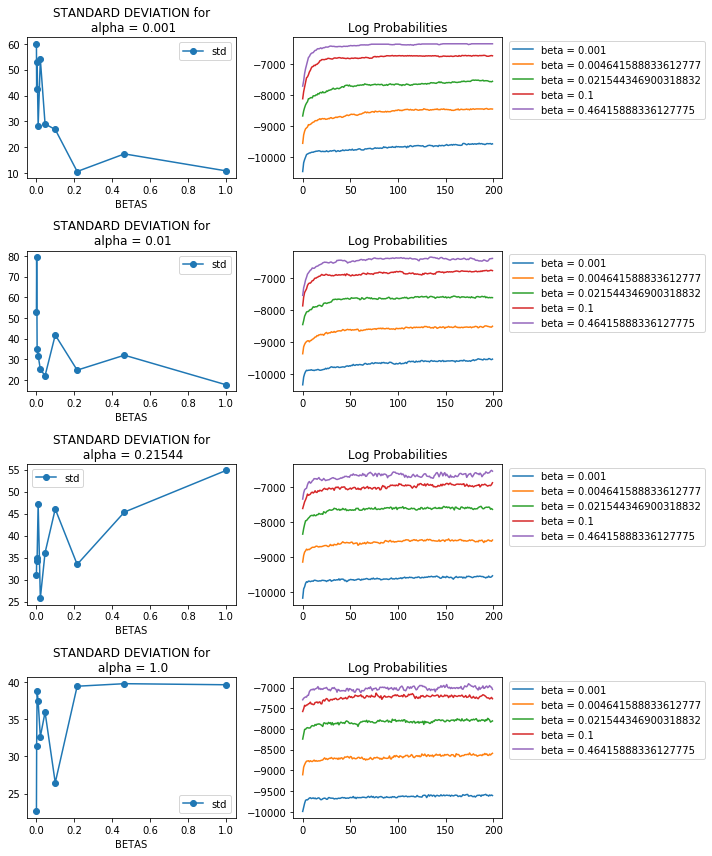

In [258]:
vals = df.alpha.unique()[[0,3,7,9]]
num_betas = 3
# vals = df.alpha.unique()
l = len(vals)
fig, ax = plt.subplots(l,2,figsize=(10,3*l))
for i,a in enumerate(vals):
    betas = df.loc[df.alpha == a].beta.values
    std = df.loc[df.alpha == a].log_probs_post_burn_std.values

    ax[i,0].plot(betas,std,'o-',label='std')
    ax[i,0].set_xlabel('BETAS')
    ax[i,0].set_title(f'STANDARD DEVIATION for\n alpha = {np.round(a,5)}')
    ax[i,0].legend()
    
    BETA = df.beta.max()
    unique_beta = df.beta.unique()
    for next_beta in unique_beta[::2]:
        ax[i,1].plot(df.loc[(df.alpha == a) & (df.beta == next_beta)].log_probs.values[0],label=f'beta = {next_beta}')
        
#     ax[i,1].plot(df.loc[(df.alpha == a) & (df.beta == BETA)].log_probs.values[0],label=f'beta = {BETA}')
#     next_beta = unique_beta[-2]
#     ax[i,1].plot(df.loc[(df.alpha == a) & (df.beta == next_beta)].log_probs.values[0],label=f'beta = {next_beta}')
#     next_beta = unique_beta[-3]
#     ax[i,1].plot(df.loc[(df.alpha == a) & (df.beta == next_beta)].log_probs.values[0],label=f'beta = {next_beta}')
#     next_beta = unique_beta[0]
#     ax[i,1].plot(df.loc[(df.alpha == a) & (df.beta == next_beta)].log_probs.values[0],label=f'beta = {next_beta}')
    ax[i,1].set_title('Log Probabilities')
    ax[i,1].legend(bbox_to_anchor=(1.01,1.01))
    
plt.tight_layout()
plt.show()    

# links to review
- see if there is an LDA package I could use so i can do multiple documents at once
- review
[google search](https://www.google.com/search?q=LATENT+DIRICHLET+ALLOCATION&client=firefox-b-1-d&sxsrf=ALeKk013pLff-_u6wIC1CtZabTRZy3YPFQ%3A1616287837907&ei=XZhWYO70NtzO0PEP55memAc&oq=LATENT+DIRICHLET+ALLOCATION&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAELEDMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAOgcIABCwAxANOgkIABCwAxANEB46BAgjECc6BQgAEJECOg4ILhCxAxCDARDHARCjAjoICC4QxwEQowI6CwguELEDEMcBEKMCOggILhCxAxCDAToICC4QxwEQrwE6AgguOggIABCxAxCDAToKCAAQhwIQsQMQFDoHCAAQhwIQFFCPXVi0dmDNeGgBcAB4AYABuAGIAekUkgEEMjEuN5gBAKABAaoBB2d3cy13aXrIAQrAAQE&sclient=gws-wiz&ved=0ahUKEwiul7uzlcDvAhVcJzQIHeeMB3MQ4dUDCA0&uact=5) <br>
[towards data science](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158) <br>
[harp pakcage](https://dsc-spidal.github.io/harp/docs/applications/lda-cgs/) <br>
[log liklihood](https://shusei-e.github.io/natural%20language%20processing/LDA-CGS-loglikelihood/) <br>
[wikipedia](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) <br>
[tds 2](https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2) <br>
[]() <br>



# 

In [30]:
# from scipy.stats import multinomial
from scipy.special import gammaln

class LDACGS:
    """Do LDA with Gibbs Sampling."""

    def __init__(self, n_topics, alpha=0.1, beta=0.1):
        """Initialize system parameters."""
        self.n_topics = n_topics
        self.alpha = alpha
        self.beta = beta

    def buildCorpus(self, filename, stopwords_file=None):
        """Read the given filename and build the vocabulary."""
        with open(filename, 'r') as infile:
            doclines = [line.rstrip().lower().split(' ') for line in infile]
        n_docs = len(doclines)
        self.vocab = list({v for doc in doclines for v in doc})
        if stopwords_file:
            with open(stopwords_file, 'r') as stopfile:
                stops = stopfile.read().split()
            self.vocab = [x for x in self.vocab if x not in stops]
            self.vocab.sort()
        self.documents = []
        for i in range(n_docs):
            self.documents.append({})
            for j in range(len(doclines[i])):
                if doclines[i][j] in self.vocab:
                    self.documents[i][j] = self.vocab.index(doclines[i][j])

    def initialize(self):
        """Initialize the three count matrices."""
        self.n_words = len(self.vocab)
        self.n_docs = len(self.documents)

        # Initialize the three count matrices.
        # The (i,j) entry of self.nmz is the number of words in document i assigned to topic j.
        self.nmz = np.zeros((self.n_docs, self.n_topics))
        # The (i,j) entry of self.nzw is the number of times term j is assigned to topic i.
        self.nzw = np.zeros((self.n_topics, self.n_words))
        # The (i)-th entry is the number of times topic i is assigned in the corpus.
        self.nz = np.zeros(self.n_topics)

        # Initialize the topic assignment dictionary.
        self.topics = {} # key-value pairs of form (m,i):z

        for m in range(self.n_docs):
            for i in self.documents[m]:
                # Get random topic assignment, i.e. z is a random integer in the range of topics
                z = np.random.randint(self.n_topics)
                # Increment count matrices
                self.nmz[m,z] += 1
                self.nzw[z,self.documents[m][i]] += 1
                self.nz[z] += 1
                # Store topic assignment
                self.topics[(m,i)] = z

    def sample(self,filename
        , burnin=100
        , sample_rate=10
        , n_samples=10
        , stopwords_file=None):
        self.buildCorpus(filename, stopwords_file)
        self.initialize()
        self.total_nzw = np.zeros((self.n_topics, self.n_words))
        self.total_nmz = np.zeros((self.n_docs, self.n_topics))
        self.logprobs = np.zeros(burnin + sample_rate*n_samples)
        for i in range(burnin):
            # Sweep and store log likelihood.
            self._sweep()
            self.logprobs[i] = self._loglikelihood()
        for i in range(n_samples*sample_rate):
            # Sweep and store log likelihood
            self._sweep()
            self.logprobs[burnin + i] = self._loglikelihood()
            if not i % sample_rate:
                # accumulate counts
                self.total_nzw += self.nzw
                self.total_nmz += self.nmz
                


    def phi(self):
        phi = self.total_nzw + self.beta
        self._phi = phi / np.sum(phi, axis=1)[:,np.newaxis]

    def theta(self):
        theta = self.total_nmz + self.alpha
        self._theta = theta / np.sum(theta, axis=1)[:,np.newaxis]

    def topterms(self,n_terms=10):
        self.phi()
        self.theta()
        vec = np.atleast_2d(np.arange(0,self.n_words))
        topics = []
        for k in range(self.n_topics):
            probs = np.atleast_2d(self._phi[k,:])
            mat = np.append(probs,vec,0)
            sind = np.array([mat[:,i] for i in np.argsort(mat[0])]).T
            topics.append([self.vocab[int(sind[1,self.n_words - 1 - i])] for i in range(n_terms)])
        return topics

    def toplines(self,n_lines=5):
        lines = np.zeros((self.n_topics,n_lines))
        for i in range(self.n_topics):
            args = np.argsort(self._theta[:,i]).tolist()
            args.reverse()
            lines[i,:] = np.array(args)[0:n_lines] + 1
        return lines

    def _removeStopwords(self, stopwords):
        return [x for x in self.vocab if x not in stopwords]

    def _conditional(self, m, w):
        dist = (self.nmz[m,:] + self.alpha) * (self.nzw[:,w] + self.beta) / (self.nz + self.beta*self.n_words)
        return dist / np.sum(dist)

    def _sweep(self):
        for m in range(self.n_docs):
            for i in self.documents[m]:

                # Retrieve vocab index for i-th word in document m.
                # Retrieve topic assignment for i-th word in document m.
                w = self.documents[m][i]
                z = self.topics[(m,i)]
                # Decrement count matrices.
                self.nmz[m,z] -= 1
                self.nzw[z,w] -= 1
                self.nz[z] -= 1
                # Get conditional distribution.
                cond = self._conditional(m, w)
                # Sample new topic assignment.
                #= multinomial.rvs(n=1,p=cond)
                #new_z = np.random.choices(n_topics,weights=cond)
                z = np.random.multinomial(1,cond).argmax()
                # Increment count matrices.
                self.nmz[m,z] += 1
                self.nzw[z,w] += 1
                self.nz[z] += 1
                # Store topic assignment
                # Store new topic assignment.
                self.topics[(m,i)] = z

    def _loglikelihood(self):
        lik = 0

        for z in range(self.n_topics):
            lik += np.sum(gammaln(self.nzw[z,:] + self.beta)) - gammaln(np.sum(self.nzw[z,:] + self.beta))
            lik -= self.n_words * gammaln(self.beta) - gammaln(self.n_words*self.beta)

        for m in range(self.n_docs):
            lik += np.sum(gammaln(self.nmz[m,:] + self.alpha)) - gammaln(np.sum(self.nmz[m,:] + self.alpha))
            lik -= self.n_topics * gammaln(self.alpha) - gammaln(self.n_topics*self.alpha)

        return lik
